**Revist the Breast Cancer Wisconsin data from sklearn. I use this dataset in the Perceptron, Logistic Regression and KNN notebook. I want to see whether how Decision Trees work on this task.**

Load necessary packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
from sklearn.metrics import classification_report

Load and plot the data

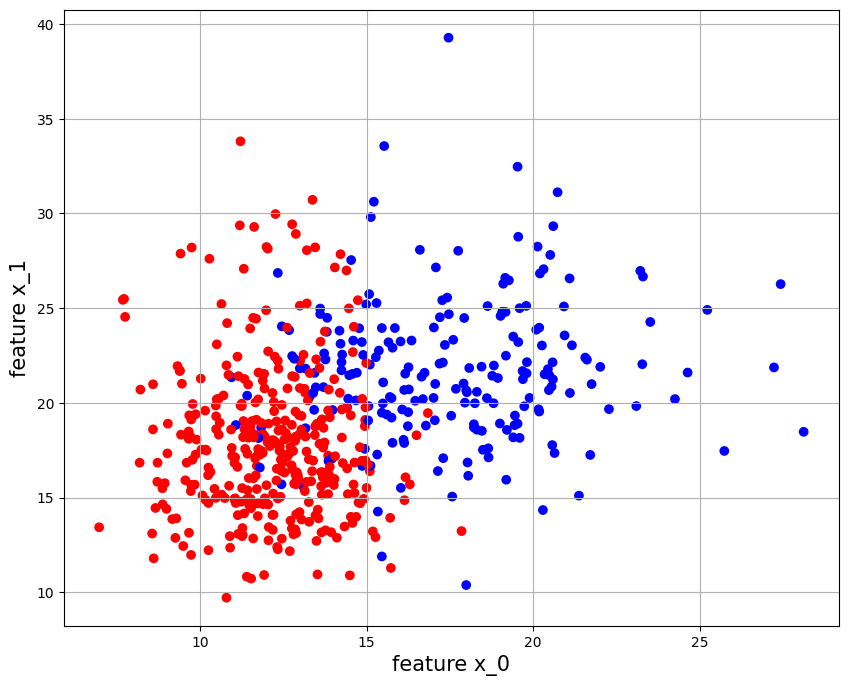

In [2]:
data = load_breast_cancer()

X = data.data
y = data.target

X = X[:,:2]

colors = ["red" if label == 1 else "blue" for label in y]

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = colors)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid(True)
plt.show()

Split and visualize the training data

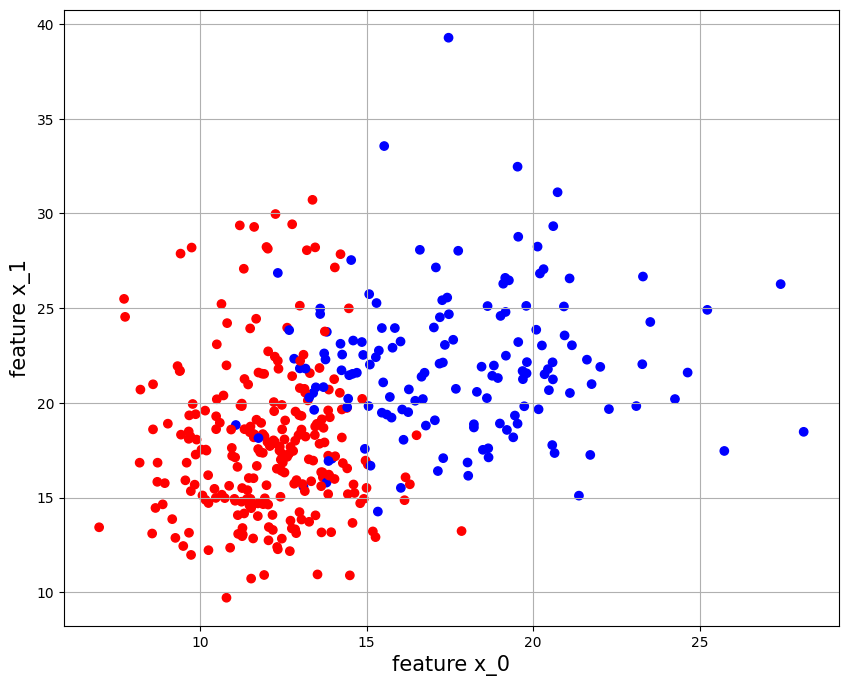

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

c_train = ["red" if label == 1 else "blue" for label in y_train]
c_test = ["red" if label == 1 else "blue" for label in y_test]

plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], X_train[:,1], c = c_train)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

Instantiate an instance of the sklearn decision tree

In [4]:
decision_tree = DecisionTreeClassifier(max_depth=15, random_state=1)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=1)

Visualize the trained tree

In [5]:
tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")

|--- x_0 <= 15.05
|   |--- x_0 <= 13.09
|   |   |--- x_1 <= 21.81
|   |   |   |--- x_1 <= 18.12
|   |   |   |   |--- class: 1
|   |   |   |--- x_1 >  18.12
|   |   |   |   |--- x_1 <= 18.16
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_1 >  18.16
|   |   |   |   |   |--- x_1 <= 18.86
|   |   |   |   |   |   |--- x_1 <= 18.79
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- x_1 >  18.79
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- x_1 >  18.86
|   |   |   |   |   |   |--- class: 1
|   |   |--- x_1 >  21.81
|   |   |   |--- x_0 <= 12.31
|   |   |   |   |--- class: 1
|   |   |   |--- x_0 >  12.31
|   |   |   |   |--- x_1 <= 22.02
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_1 >  22.02
|   |   |   |   |   |--- x_1 <= 22.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- x_1 >  22.27
|   |   |   |   |   |   |--- x_1 <= 23.90
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- x_1 >  23.90
| 

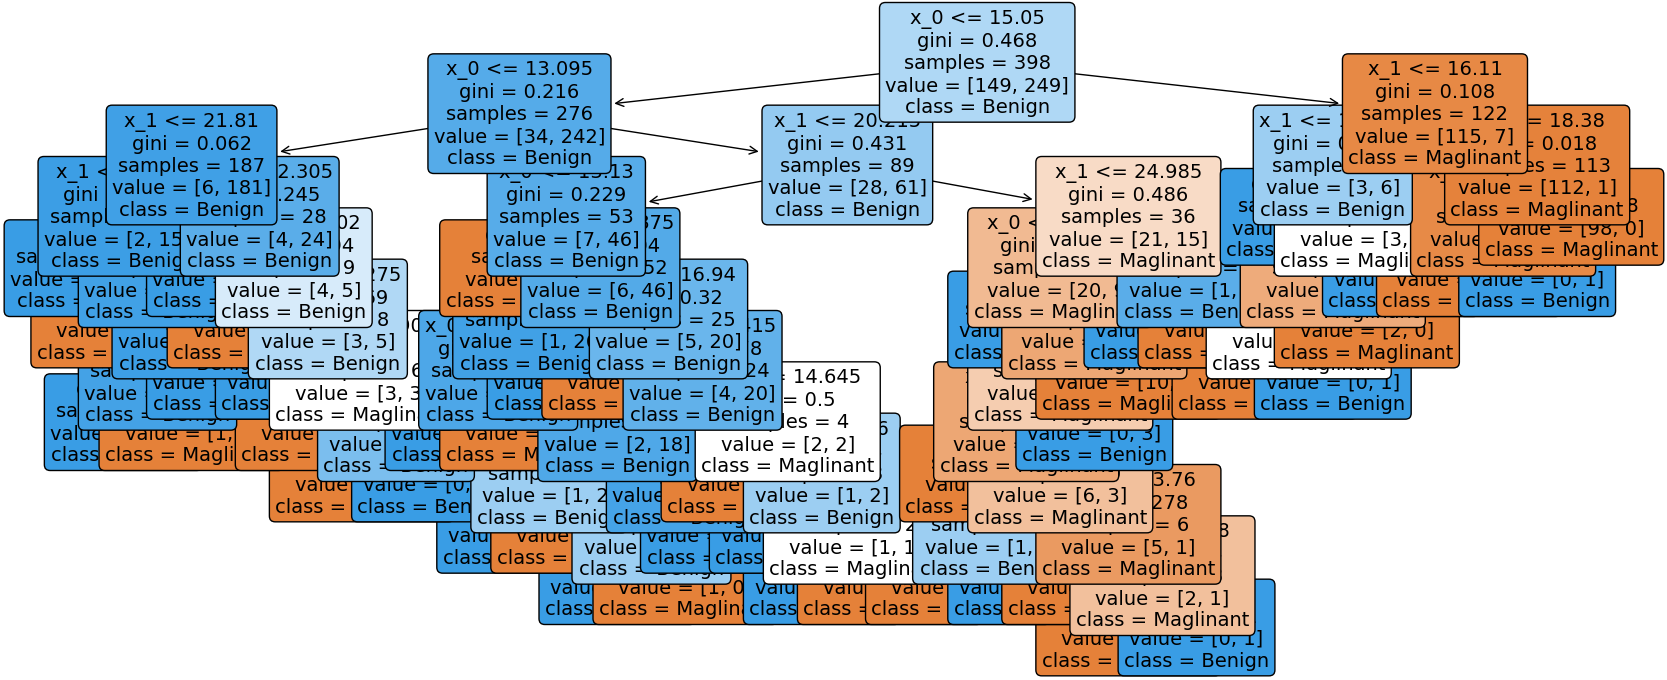

In [6]:
plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
              feature_names=["x_0","x_1"],
              class_names=["Maglinant","Benign"],
              rounded=True,
              filled=True,
              fontsize=14)
plt.show()

Visualize the decision regions

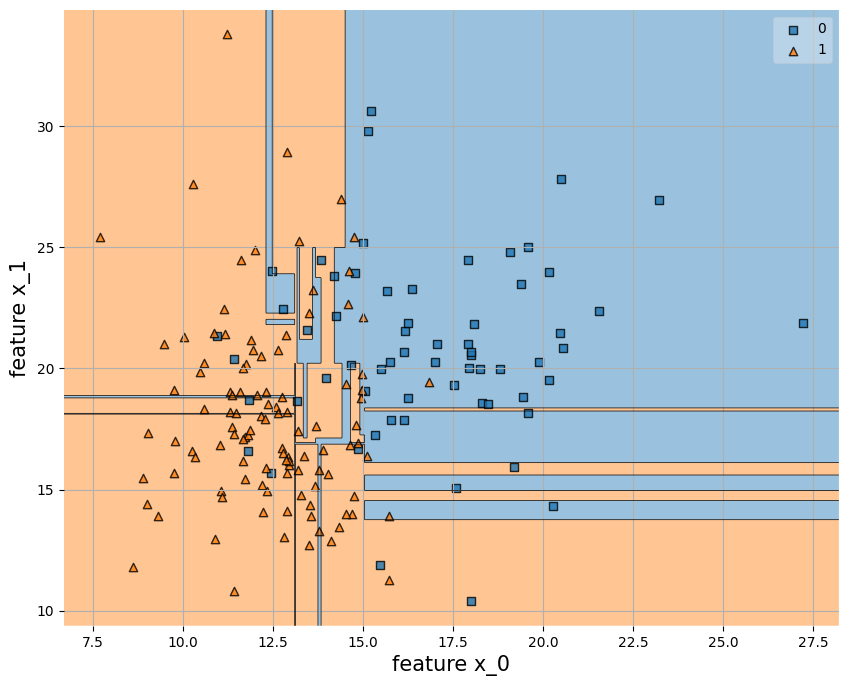

In [7]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

Evaluate the performance on the testing data

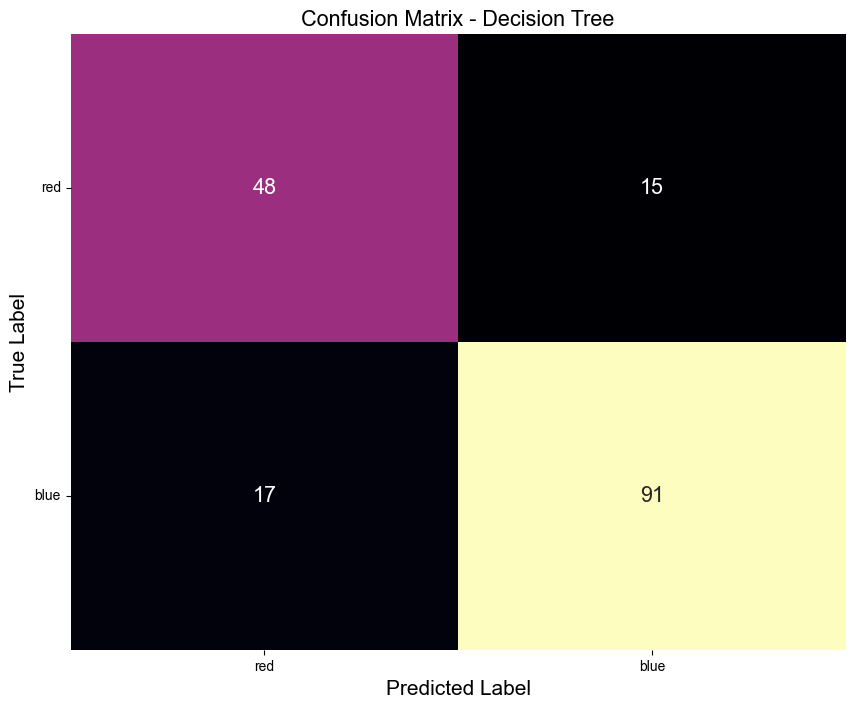

In [8]:
test_pred_decision_tree = decision_tree.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)
matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

In [9]:
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        63
           1       0.86      0.84      0.85       108

    accuracy                           0.81       171
   macro avg       0.80      0.80      0.80       171
weighted avg       0.81      0.81      0.81       171



<span style="color: blue;">We get a 81% predication accuracy rate.</span>

We further revisit the Boston Housing data to apply Decision Trees to regressions. This data was used in the Linear Regression notebook and get a RMSE = 4.45. I want to see whether Decision Trees will perform better.

In [10]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston', version=1)
X, y = boston.data, boston.target

/usr/local/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

reg = DecisionTreeRegressor(max_depth=20)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

RMSE: 3.589879781010119


<span style="color: blue;">We find a smaller RMSE by using Decision Trees, which means that this algorithm is useful in the Boston Housing price prediction.</span>

---

### Conclusion

In summary, the Decision Trees are useful both in classification and regression tasks.